In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Zadanie - estymatory
Sprawdź symulacyjnie nieobciążoność estymatorów wariancji dla
\begin{equation*}
    \hat{\sigma}^2 = S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2,
\end{equation*}
oraz
\begin{equation*}
    \hat{\sigma}^2 = S_n^2 = \frac{1}{n}\sum_{i=1}^n(X_i-\overline{X})^2.
\end{equation*}

1. Wygeneruj próbkę $n$-elementową z wybranego rozkładu.
2. Policz dla wygenerowanej próbki $S^2$ oraz $S_n^2$.
3. Powtórz kroki 1-2 $N$ razy, np. $N=1000$.
4. Policz średnią z wygenerowanych $N$ razy wartości wariancji dla obu estymatorów.
4. Powtórz kroki 1-4 dla róznych liczności $n$, np. dla $n\in[5, 100]$.
5. Narysuj wykres zależności wyestymowanej wartości wariancji dla obu estymatorów w zależności od liczności próbki.
6. Powtórz kroki 1-6 dla innej rodziny rozkładów.

In [2]:
#### rozkład normalny ####

In [3]:
N = 1000

n_vec = np.arange(5, 100, 1)
var0, var1 = np.zeros(len(n_vec)), np.zeros(len(n_vec))
for i, n in enumerate(n_vec):
    var0_vec, var1_vec = np.zeros(N), np.zeros(N)
    for j in np.arange(N):
        x = stats.norm.rvs(size=n, loc=5, scale=1)
        var0_vec[j] = np.var(x, ddof=0)
        var1_vec[j] = np.var(x, ddof=1)
    var0[i] = var0_vec.mean()
    var1[i] = var1_vec.mean()

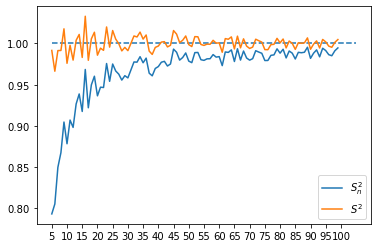

In [4]:
plt.plot(var0, label="$S^2_n$")
plt.plot(var1, label="$S^2$")
plt.xticks(ticks=np.arange(0, len(n_vec) + 5, 5), labels=np.arange(5, 105, 5))
plt.hlines(xmin=0, xmax=100, y=1, linestyles='--')
plt.legend()
plt.show()

In [5]:
#### rozklad wykladniczy ####

In [6]:
n_vec = np.arange(5, 100, 1)
lam = 2
var0, var1 = np.zeros(len(n_vec)), np.zeros(len(n_vec))
for i, n in enumerate(n_vec):
    var0_vec, var1_vec = np.zeros(N), np.zeros(N)
    for j in np.arange(N):
        x = stats.expon.rvs(size=n, scale=1/lam)
        var0_vec[j] = np.var(x, ddof=0)
        var1_vec[j] = np.var(x, ddof=1)
    var0[i] = var0_vec.mean()
    var1[i] = var1_vec.mean()

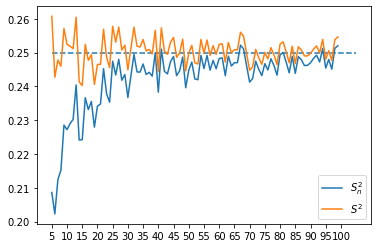

In [7]:
plt.plot(var0, label="$S^2_n$")
plt.plot(var1, label="$S^2$")
plt.xticks(ticks=np.arange(0, len(n_vec) + 5, 5), labels=np.arange(5, 105, 5))
plt.hlines(xmin=0, xmax=100, y=1/(lam ** 2), linestyles='--')
plt.legend()
plt.show()

# Estymacja punktowa 

### Zadania
1. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu gamma $\Gamma(\alpha, \beta)$, gdzie $\alpha, \beta>0$. Stosując metodę momentów wyznaczyć estymatory parametrów $\alpha$ i $\beta$.

**Wskazówka**: Pokaż, że $S_n^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 - \overline{X}^2 = M_2 - M_1^2$.

2. Niech $X_1, \ldots, X_n$ będzie próbą losową z rozkładu wykładniczego $\text{Exp}(\lambda)$, gdzie $\lambda>0$. Stosując metodę największej wiarogodności wyznaczyć estymator parametru $\lambda$.


3. W celu oszacowania niezawodności pewnego urządzenia dokonano 10 pomiarów czasu bezawaryjnej pracy tego urządzenia i otrzymano następujące wyniki (w godzinach): 1119,  627,  790,  626, 1477, 1470, 1466, 1027, 1480,  904. Zakładamy, że czas bezawaryjnej pracy tego urządzenia ma rozkład wykładniczy.
    a) Znaleźć estymator funkcji niezawodności tego urządzenia.
    b) Jakie jest prawdopodobieństwo, że dane urządzenie nie ulegnie awarii w ciągu 900 godzin pracy?
    
**Wskazówka**: Funkcja niezawodności: $S(x)=1-F(x)=P(X>x)$.

## Zadanie 1

1. Pokażemy, że $S_n^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 - \overline{X}^2$:

\begin{equation*}
    \begin{split}
        S^2_n &= \frac{1}{n} \sum_{i=1}^n (X_i - \overline(X))^2 \\
        &= \frac{1}{n} \sum_{i=1}^n (X_i^2 - 2X_i\overline{X} + \overline{X}^2) \\
        &=  \frac{1}{n} \sum_{i=1}^n X_i^2 -  2\overline{X} \cdot \frac{1}{n} \sum_{i=1}^n X_i + \frac{1}{n} \sum_{i=1}^n \overline{X}^2\\
        &= \frac{1}{n} \sum_{i=1}^n X_i^2 -2\overline{X}^2 + \frac{1}{n}  \cdot n \overline{X}^2\\
        &=  \frac{1}{n} \sum_{i=1}^n X_i^2 -\overline{X}^2
    \end{split}
\end{equation*}

2. Wyznaczymy estymatory parametrów $\alpha$ i $\beta$, wiemy, że jeśli $X\sim \Gamma(\alpha, \beta)$, to

\begin{equation*}
    \mathbb{E}X = \frac{\alpha}{\beta}, \quad \text{Var}(X) = \frac{\alpha}{\beta^2}.
\end{equation*}

Otrzymujemy
\begin{equation*}
    \alpha = \mathbb{E}X\cdot\beta, \quad \alpha = \text{Var}(X)\cdot\beta^2 = (\mathbb{E}X^2 - (\mathbb{E}X)^2)\cdot\beta^2,
\end{equation*}
stąd
\begin{equation*}
    \begin{split}
    \beta &= \frac{\mathbb{E}X}{\mathbb{E}X^2 - (\mathbb{E}X)^2},\\
    \alpha &= \frac{(\mathbb{E}X)^2}{\mathbb{E}X^2 - (\mathbb{E}X)^2}.
    \end{split}
\end{equation*}

Estymator metody momentów ma postać:
\begin{equation*}
    \begin{split}
    \beta &= \frac{M_1}{M_2 - M_1^2} = \frac{\overline{X}}{S^2_n},\\
    \alpha &= \frac{M_1^2}{M_2 - M_1^2} = \frac{\overline{X}^2}{S^2_n}.
    \end{split}
\end{equation*}


## Zadanie 2

$X_i \sim \text{Exp}(\lambda), \text{ iid}$ oraz gęstość ma postać $f(x) = \lambda \exp({-\lambda x})$.

1. znaleźć funkcję wiarogodności $L$:
$$
L(x_1, \ldots, x_n, \lambda) = f_{\lambda}(x_1)\cdot\ldots\cdot f_{\lambda}(x_n) = \lambda \exp({-\lambda x_1})\cdot\ldots\cdot \lambda \exp({-\lambda x_n}) = \lambda^n \exp({-\lambda \sum_{i=1}^n x_i}).
$$

2. znaleźć $\ln{L}$:
$$
ln(L) = n \ln{\lambda} - \lambda \sum_{i=1}^n x_i.
$$ 

3. obliczyć pochodną cząstkową: $\frac{\partial}{\partial\lambda}\ln{L}$:
$$
\frac{\partial}{\partial\lambda}\ln{L} = \frac{n}{\lambda} - \sum_{i=1}^n x_i.
$$

4. znaleźć rozwiązanie $\theta_0$ równania $\frac{\partial}{\partial\lambda}\ln{L}=0$:
$$
\frac{n}{\lambda} - \sum_{i=1}^n x_i = 0 \implies \lambda_0 = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\overline{x}}.
$$

5. sprawdzi, czy w $\theta_0$, funkcja $\ln{L}$ osiąga maksimum:
$$
 \frac{\partial^2}{\partial\lambda^2}\ln{L}\Bigg|_{\lambda=\lambda_0} = -\frac{n}{\lambda^2} < 0.
$$

Zatem estymatorem największej wiarogodności parametru $\lambda$ jest: 
$$
\hat{\lambda} = \frac{1}{\overline{X}}.
$$

In [8]:
# Zadanie 3

# F(x) = 1 - exp(-lambda * x) ====> S(x) = exp(-lambda * x)
# Jaki jest estymator NW parametru lambda?
# lambda_hat = 1/x_mean

x = [1119, 627, 790, 626, 1477, 1470, 1466, 1027, 1480, 904]
lambda_hat = 1/np.mean(x)
print("Oszacowana wartość parametru lamba na podstawie metody NW: {}".format(lambda_hat))

#P(X>900)=S(900)
print(1 - stats.expon.cdf(900, scale=1/lambda_hat))

prob = np.exp(-900*lambda_hat)
print("Prawdopodobieństwo, że dane urządzenie nie ulegnie awarii w ciagu 900 godzin pracy: P(X>900)={}".format(np.round(prob, 4)))

Oszacowana wartość parametru lamba na podstawie metody NW: 0.0009102494083378847
0.4407733560494924
Prawdopodobieństwo, że dane urządzenie nie ulegnie awarii w ciagu 900 godzin pracy: P(X>900)=0.4408
